# Advanced Feature Selection

https://www.kdnuggets.com/2023/06/advanced-feature-selection-techniques-machine-learning-models.html

## Filter based

Information Gain

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.feature_selection import mutual_info_regression

# Load the diabetes dataset
data = load_diabetes()

# Split the dataset into features and target
X = data.data
y = data.target

In [24]:
print(X.shape)
print(y.shape)
X_stacked = np.hstack((X, y.reshape(-1,1)))
X_stacked

(442, 10)
(442,)


array([[ 3.80759064e-02,  5.06801187e-02,  6.16962065e-02, ...,
         1.99074862e-02, -1.76461252e-02,  1.51000000e+02],
       [-1.88201653e-03, -4.46416365e-02, -5.14740612e-02, ...,
        -6.83315471e-02, -9.22040496e-02,  7.50000000e+01],
       [ 8.52989063e-02,  5.06801187e-02,  4.44512133e-02, ...,
         2.86130929e-03, -2.59303390e-02,  1.41000000e+02],
       ...,
       [ 4.17084449e-02,  5.06801187e-02, -1.59062628e-02, ...,
        -4.68825342e-02,  1.54907302e-02,  1.32000000e+02],
       [-4.54724779e-02, -4.46416365e-02,  3.90621530e-02, ...,
         4.45287288e-02, -2.59303390e-02,  2.20000000e+02],
       [-4.54724779e-02, -4.46416365e-02, -7.30303027e-02, ...,
        -4.22151394e-03,  3.06440941e-03,  5.70000000e+01]])

In [25]:
columns_df = data.feature_names + ['target']
columns_df

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']

In [27]:
df = pd.DataFrame(X_stacked, columns=columns_df)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [28]:
# Apply Information Gain
ig = mutual_info_regression(X, y)


In [34]:
df_ig = pd.DataFrame({'Feature_Names': data.feature_names, 'Info_Gain': ig}).set_index('Feature_Names')
df_ig.sort_values('Info_Gain', ascending=False).style.bar()

,Info_Gain
Feature_Names,
bmi,0.172175
s5,0.149907
s6,0.118368
s4,0.099466
s1,0.068069
s3,0.061103
bp,0.055154
sex,0.034117
s2,0.014654


Use a dictionairy to store the result of the info gain

In [39]:
feature_score = {data.feature_names[i]:ig[i] for i in range(len(ig))}
feature_score


{'age': 0.0,
 'sex': 0.034116535497766165,
 'bmi': 0.17217540855096347,
 'bp': 0.055153769432680466,
 's1': 0.06806858621367118,
 's2': 0.014654068288125988,
 's3': 0.0611031526351451,
 's4': 0.09946611158865659,
 's5': 0.14990671812336887,
 's6': 0.11836776761423673}

In [45]:
sorted_features = sorted(feature_score.items(), key=lambda x: x[1], reverse=True)
for feature, value in sorted_features:
    print('Feature: ', feature,' Value: ', value)

Feature:  bmi  Value:  0.17217540855096347
Feature:  s5  Value:  0.14990671812336887
Feature:  s6  Value:  0.11836776761423673
Feature:  s4  Value:  0.09946611158865659
Feature:  s1  Value:  0.06806858621367118
Feature:  s3  Value:  0.0611031526351451
Feature:  bp  Value:  0.055153769432680466
Feature:  sex  Value:  0.034116535497766165
Feature:  s2  Value:  0.014654068288125988
Feature:  age  Value:  0.0


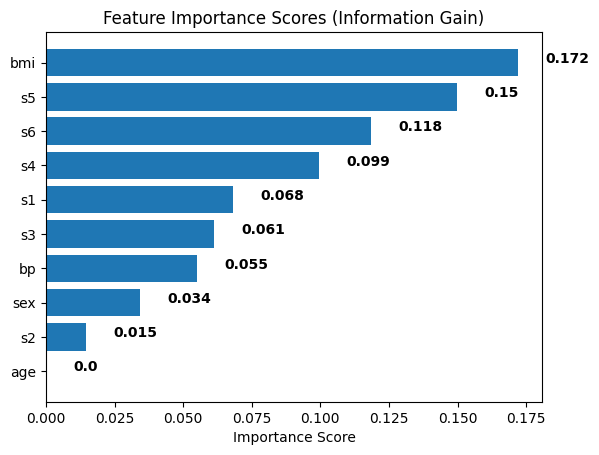

In [46]:
# Plot a horizontal bar chart of the feature importance scores
fig, ax = plt.subplots()
y_pos = np.arange(len(sorted_features))
ax.barh(y_pos, [score for feature, score in sorted_features], align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels([feature for feature, score in sorted_features])
ax.invert_yaxis()  # Labels read top-to-bottom
ax.set_xlabel("Importance Score")
ax.set_title("Feature Importance Scores (Information Gain)")

# Add importance scores as labels on the horizontal bar chart
for i, v in enumerate([score for feature, score in sorted_features]):
    ax.text(v + 0.01, i, str(round(v, 3)), color="black", fontweight="bold")
plt.show()

**Chi-Square**

While the Chi-square test is a commonly used feature selection method, it is typically used for categorical data, where the features and target variables are discrete.

Code for Chi-Square is missing so far

**Fisher's Score**

Fisher's Discriminant Ratio, commonly known as Fisher's Score, is a feature selection approach that ranks features based on their ability to differentiate various classes in a dataset. It may be used for continuous features in a classification problem.

Fisher's Score is calculated as the ratio of between-class and within-class variance. A higher Fisher's Score implies the characteristic is more discriminative and valuable for classification.

## Wrapper Based Approach

- Forward Selection
- Backward Selection
- Exhaustive Feature Selection
- Recursive Feature Elimination

**Forward Selection**

In forward selection, you start with an empty feature set and iteratively add features to the set. At each step, you evaluate the model's performance with the current feature set and the additional feature. The feature that results in the best performance improvement is added to the set.

In [47]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load the breast cancer dataset
data = load_breast_cancer()

# Split the dataset into features and target
X = data.data
y = data.target

ModuleNotFoundError: No module named 'mlxtend'